In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver ## Change to MemorySaver for persistent storage
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver
load_dotenv()

True

In [2]:


llm = ChatGroq(
        groq_api_key=os.getenv("GROQ_API_KEY"), # type: ignore
        model_name="Gemma2-9b-It",# type: ignore
        temperature=0.2 ## this is creative parameter
    )

In [4]:
class JokeState(TypedDict):
    '''
    JokeState is a TypedDict that defines the structure of the state used in the joke graph.

    '''

    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state: JokeState) -> dict[str, str]:

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [6]:
def generate_explanation(state: JokeState) -> dict[str, str]:

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [7]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

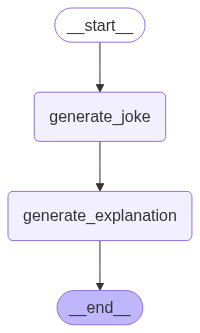

In [8]:
workflow

In [9]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza slice go to the doctor? \n\nBecause it was feeling a little cheesy! 🍕🩺  \n',
 'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made with cheese, so a slice of pizza literally *is* cheesy.\n\n* **Figurative meaning:**  "Cheesy" can also mean something that is corny, cheesy, or unoriginal.  \n\nThe joke sets you up to think about the pizza slice literally being made of cheese. Then, it uses the word "cheesy" in its figurative sense to mean the pizza slice is feeling unwell or a bit silly.  \n\n\nLet me know if you\'d like to hear another joke! 😊 \n\n'}

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza slice go to the doctor? \n\nBecause it was feeling a little cheesy! 🍕🩺  \n', 'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made with cheese, so a slice of pizza literally *is* cheesy.\n\n* **Figurative meaning:**  "Cheesy" can also mean something that is corny, cheesy, or unoriginal.  \n\nThe joke sets you up to think about the pizza slice literally being made of cheese. Then, it uses the word "cheesy" in its figurative sense to mean the pizza slice is feeling unwell or a bit silly.  \n\n\nLet me know if you\'d like to hear another joke! 😊 \n\n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d1-d819-6cb0-8002-8b402bb55ef1'}}, metadata={'source': 'loop', 'writes': {'generate_explanation': {'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made 

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza slice go to the doctor? \n\nBecause it was feeling a little cheesy! 🍕🩺  \n', 'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made with cheese, so a slice of pizza literally *is* cheesy.\n\n* **Figurative meaning:**  "Cheesy" can also mean something that is corny, cheesy, or unoriginal.  \n\nThe joke sets you up to think about the pizza slice literally being made of cheese. Then, it uses the word "cheesy" in its figurative sense to mean the pizza slice is feeling unwell or a bit silly.  \n\n\nLet me know if you\'d like to hear another joke! 😊 \n\n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d1-d819-6cb0-8002-8b402bb55ef1'}}, metadata={'source': 'loop', 'writes': {'generate_explanation': {'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made

In [12]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta blush? \n\nBecause it saw the salad dressing! 🍝🍅  \n',
 'explanation': 'This joke plays on the word "dressing" having two meanings:\n\n* **Food dressing:**  A sauce or condiment used on salads.\n* **Dressing someone down:**  Criticizing or reprimanding someone.\n\nThe joke sets up the expectation that the pasta will blush for a romantic reason, like seeing someone attractive.  However, the punchline uses the food meaning of "dressing," implying the pasta is embarrassed or flustered by the salad dressing, creating a silly and unexpected twist. \n\n\nLet me know if you\'d like to hear another joke! 😄 \n'}

In [13]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza slice go to the doctor? \n\nBecause it was feeling a little cheesy! 🍕🩺  \n', 'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made with cheese, so a slice of pizza literally *is* cheesy.\n\n* **Figurative meaning:**  "Cheesy" can also mean something that is corny, cheesy, or unoriginal.  \n\nThe joke sets you up to think about the pizza slice literally being made of cheese. Then, it uses the word "cheesy" in its figurative sense to mean the pizza slice is feeling unwell or a bit silly.  \n\n\nLet me know if you\'d like to hear another joke! 😊 \n\n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d1-d819-6cb0-8002-8b402bb55ef1'}}, metadata={'source': 'loop', 'writes': {'generate_explanation': {'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made 

In [14]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza slice go to the doctor? \n\nBecause it was feeling a little cheesy! 🍕🩺  \n', 'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made with cheese, so a slice of pizza literally *is* cheesy.\n\n* **Figurative meaning:**  "Cheesy" can also mean something that is corny, cheesy, or unoriginal.  \n\nThe joke sets you up to think about the pizza slice literally being made of cheese. Then, it uses the word "cheesy" in its figurative sense to mean the pizza slice is feeling unwell or a bit silly.  \n\n\nLet me know if you\'d like to hear another joke! 😊 \n\n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d1-d819-6cb0-8002-8b402bb55ef1'}}, metadata={'source': 'loop', 'writes': {'generate_explanation': {'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made

In [15]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta blush? \n\nBecause it saw the salad dressing! 🍝🍅  \n', 'explanation': 'This joke plays on the word "dressing" having two meanings:\n\n* **Food dressing:**  A sauce or condiment used on salads.\n* **Dressing someone down:**  Criticizing or reprimanding someone.\n\nThe joke sets up the expectation that the pasta will blush for a romantic reason, like seeing someone attractive.  However, the punchline uses the food meaning of "dressing," implying the pasta is embarrassed or flustered by the salad dressing, creating a silly and unexpected twist. \n\n\nLet me know if you\'d like to hear another joke! 😄 \n'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d2-13a5-61de-8002-004dcfd5f348'}}, metadata={'source': 'loop', 'writes': {'generate_explanation': {'explanation': 'This joke plays on the word "dressing" having two meanings:\n\n* **Food dressing:**  A sauce or condiment use

### Time Travel

In [15]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0798b7-b9f4-6fac-8001-a91c7940795f"}})

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza slice go to the doctor? \n\nBecause it was feeling a little cheesy! 🍕🩺  \n'}, next=('generate_explanation',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0798b7-b9f4-6fac-8001-a91c7940795f'}}, metadata={'source': 'loop', 'writes': {'generate_joke': {'joke': 'Why did the pizza slice go to the doctor? \n\nBecause it was feeling a little cheesy! 🍕🩺  \n'}}, 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-15T03:54:02.993860+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798b7-b387-6598-8000-420383c8d89b'}}, tasks=(PregelTask(id='38df8635-e47b-3414-43b4-8ea2a5eb002c', name='generate_explanation', path=('__pregel_pull', 'generate_explanation'), error=None, interrupts=(), state=None, result={'explanation': 'This joke plays on the double meaning of the word "cheesy." \n\n* **Literal meaning:** Pizza is made with cheese, so a pizza slice lite

In [111]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5"}})

{'topic': 'pizza',
 'joke': 'Why did the mushroom go to the pizza party? Because he was a fungi and everyone wanted a pizza him!',
 'explanation': 'This joke plays on the word "fun guy" (fungi) which sounds like "fungi," a type of mushroom. The play on words is that the mushroom went to the pizza party because he was a "fun guy" and people wanted to "pizza" (see) him. The joke is a pun that combines the idea of mushrooms being fungi with the concept of being a fun person at a party.'}

In [112]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the pizza party? Because he was a fungi and everyone wanted a pizza him!', 'explanation': 'This joke plays on the word "fun guy" (fungi) which sounds like "fungi," a type of mushroom. The play on words is that the mushroom went to the pizza party because he was a "fun guy" and people wanted to "pizza" (see) him. The joke is a pun that combines the idea of mushrooms being fungi with the concept of being a fun person at a party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc70-100a-6bff-8002-7d6c3d37b1f4'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:57:21.959833+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc70-064c-630b-8001-707d60a085ad'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the 

#### Updating State

In [113]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f06cc72-ca16-6359-8001-7eea05e07dd2'}}

In [114]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc72-ca16-6359-8001-7eea05e07dd2'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:58:35.155132+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-7232-6cb1-8000-f71609e6cec5'}}, tasks=(PregelTask(id='0f085bb0-c1e8-d9fd-fb15-c427126b7cd6', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the pizza party? Because he was a fungi and everyone wanted a pizza him!', 'explanation': 'This joke plays on the word "fun guy" (fungi) which sounds like "fungi," a type of mushroom. The play on words is that the mushroom went to the pizza party because he was a "fun guy" and people 

In [115]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc72-ca16-6359-8001-7eea05e07dd2"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa bring a ladder to the party? \nBecause it wanted to be the best snack in the room and rise to the occasion!',
 'explanation': 'This joke plays on the double meaning of the word "rise." In one sense, "rise" means to physically move upwards, which is why the samosa brought a ladder to the party. However, in another sense, "rise" can also mean to perform well or excel, as in rising to the occasion. So, the samosa brought a ladder to symbolize its desire to physically rise above the other snacks at the party and also to metaphorically rise to the occasion by being the best snack in the room.'}

In [116]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa bring a ladder to the party? \nBecause it wanted to be the best snack in the room and rise to the occasion!', 'explanation': 'This joke plays on the double meaning of the word "rise." In one sense, "rise" means to physically move upwards, which is why the samosa brought a ladder to the party. However, in another sense, "rise" can also mean to perform well or excel, as in rising to the occasion. So, the samosa brought a ladder to symbolize its desire to physically rise above the other snacks at the party and also to metaphorically rise to the occasion by being the best snack in the room.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc75-4407-6195-8003-b08dcfd27511'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:59:41.628661+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoin

### Fault Tolerance

In [3]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [4]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [5]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(40)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [6]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

# builder.set_entry_point("step_1")
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

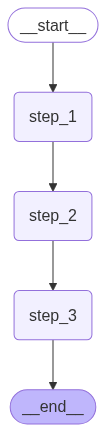

In [7]:
graph

In [8]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [9]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d8-dc0b-6577-8001-15050c4e4902'}}, metadata={'source': 'loop', 'writes': {'step_1': {'step1': 'done', 'input': 'start'}}, 'step': 1, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-15T04:08:52.405183+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d8-dc08-66ce-8000-1b6cdf0b5577'}}, tasks=(PregelTask(id='97c21a56-bcb4-546b-061a-e70953ca633d', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798d8-dc08-66ce-8000-1b6cdf0b5577'}}, metadata={'source': 'loop', 'writes': None, 'step': 0, 'parents': {}, 'thread_id': 'thread-1'}, cre

In [10]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}}) ## resume from the last checkpoint
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [11]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798dc-e626-630c-8003-bb31c2976864'}}, metadata={'source': 'loop', 'writes': {'step_3': None}, 'step': 3, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-15T04:10:40.838938+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798dc-e623-681d-8002-34bc6de1a2f5'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0798dc-e623-681d-8002-34bc6de1a2f5'}}, metadata={'source': 'loop', 'writes': {'step_2': {'step2': 'done'}}, 'step': 2, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-15T04:10:40.837839+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '